## 流距离嵌入

- window：5, 一句话中，两个词最远距离为5。
- 考虑到了词序，例如：“We may encounter many defeats, but we must not be defeated.”, encounter-defeats 词对会+1，而defeats-encounter 词对不会+1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
avgdist_file = './data/dist_avg.npy'
count_file = './data/count.npy'

avgdist = np.load(avgdist_file)
count = np.load(count_file)

In [3]:
avgdist_flat = avgdist.flatten()
avgdist_flat_nonz = np.sort(avgdist_flat[avgdist_flat.nonzero()])

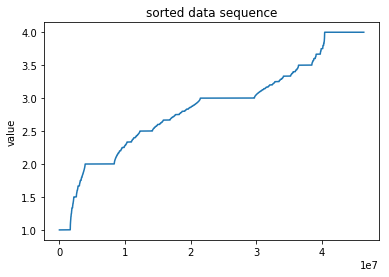

In [4]:
plt.plot(avgdist_flat_nonz)
plt.title('sorted data sequence')
plt.ylabel('value')
plt.show()

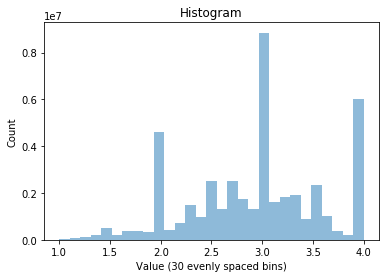

In [5]:
bins = np.linspace(np.ceil(np.min(avgdist_flat_nonz)), np.floor(np.max(avgdist_flat_nonz)), 30)
 
plt.hist(avgdist_flat_nonz, bins=bins, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Value (30 evenly spaced bins)')
plt.ylabel('Count')
 
plt.show()

In [6]:
avgdist_var = np.var(avgdist_flat_nonz)
avgdist_mean = np.mean(avgdist_flat_nonz)

print '均值: %f' % avgdist_mean
print '方差: %f' % avgdist_var

均值: 2.859198
方差: 0.551506


In [7]:
avgdist_min = np.min(avgdist_flat_nonz)
min_idx = np.where(avgdist == 1.0)

print '最小值：%f' % avgdist_min
print '平均距离是：%f 的词对个数：%d' % (avgdist_min, len(min_idx[0]))

最小值：1.000000
平均距离是：1.000000 的词对个数：12814


## 结果分析

avg_dist 值小的，可能是出现的频次不高，但是都是在一起出现的
用 counts 大的排序，更有实际意义

In [11]:
from train import Vocabulary
vocab = Vocabulary()

words = []
for i, val in enumerate(zip(min_idx[0], min_idx[1])):
    key_word = '%s-%s' % (vocab.get_word(val[0]), vocab.get_word(val[1]))
    count_word = count[val[0], val[1]]
    words.append({'key':key_word, 'cnt':count_word})

words.sort(key=lambda x:x['cnt'], reverse=True)

for i in words[:100]:
    print i

{'cnt': 1639.0, 'key': 'foo-fighters'}
{'cnt': 1593.0, 'key': 'originally-computed'}
{'cnt': 1370.0, 'key': 'adequate-yearly'}
{'cnt': 1289.0, 'key': 'eyed-peas'}
{'cnt': 1239.0, 'key': 'atmospheric-administration'}
{'cnt': 1068.0, 'key': 'garden-merit'}
{'cnt': 992.0, 'key': 'costa-mesa'}
{'cnt': 876.0, 'key': 'palestine-exploration'}
{'cnt': 866.0, 'key': 'lonely-hearts'}
{'cnt': 838.0, 'key': 'electronic-frontier'}
{'cnt': 838.0, 'key': 'sage-publications'}
{'cnt': 673.0, 'key': 'simple-minds'}
{'cnt': 580.0, 'key': 'deeply-discounted'}
{'cnt': 577.0, 'key': 'costs-exemption'}
{'cnt': 539.0, 'key': 'jimmy-eat'}
{'cnt': 516.0, 'key': 'spider-catalog'}
{'cnt': 481.0, 'key': 'coach-composition'}
{'cnt': 479.0, 'key': 'statutory-instrument'}
{'cnt': 477.0, 'key': 'stanley-cups'}
{'cnt': 466.0, 'key': 'aid-ratio'}
{'cnt': 459.0, 'key': 'naughty-dog'}
{'cnt': 457.0, 'key': 'trade-paperbacks'}
{'cnt': 448.0, 'key': 'teen-hunger'}
{'cnt': 446.0, 'key': 'merry-wives'}
{'cnt': 445.0, 'key': '

In [13]:
count_flat = count.flatten()
val = np.partition(count_flat, -100)[-100:]

words_cnt = []
for i in val[::-1]:
    idx_0, idx_1 = np.where(i==count)
    key_word = '%s-%s' % (vocab.get_word(idx_0[0]), vocab.get_word(idx_1[0]))
    avgdist_word = avgdist[idx_0[0], idx_1[0]]
    words_cnt.append({'key':key_word, 'cnt':i, 'avgdist': avgdist_word})
 
words_cnt.sort(key=lambda x:x['cnt'], reverse=True)

for i in words_cnt:
    print i

{'cnt': 1102693.0, 'key': 'united-states', 'avgdist': 1.0093471165591874}
{'cnt': 760376.0, 'key': 'new-york', 'avgdist': 1.0403366229339168}
{'cnt': 468649.0, 'key': 'high-school', 'avgdist': 1.0688297638531181}
{'cnt': 392738.0, 'key': 'world-war', 'avgdist': 1.0189693892620526}
{'cnt': 276908.0, 'key': 'may-refer', 'avgdist': 1.1273744348303407}
{'cnt': 265955.0, 'key': 'also-known', 'avgdist': 1.0779455170987573}
{'cnt': 211612.0, 'key': 'new-zealand', 'avgdist': 1.0130852692663932}
{'cnt': 201213.0, 'key': 'war-ii', 'avgdist': 1.0226227927618992}
{'cnt': 200990.0, 'key': 'los-angeles', 'avgdist': 1.0055077367033185}
{'cnt': 196407.0, 'key': 'world-ii', 'avgdist': 2.0065985428217936}
{'cnt': 195522.0, 'key': 'new-city', 'avgdist': 2.0166477429649858}
{'cnt': 192153.0, 'key': 'first-time', 'avgdist': 1.0718802204493294}
{'cnt': 190443.0, 'key': 'took-place', 'avgdist': 1.0701942313448118}
{'cnt': 187915.0, 'key': 'york-city', 'avgdist': 1.0241864672857408}
{'cnt': 177112.0, 'key': '